In [1]:
pip install pycountry

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats
from scipy.stats import norm
import statistics
import statsmodels.api as sm
import pylab as py

import plotly.express as px
import pycountry

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("/content/gapminder.csv")
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [4]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr

    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence

    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence

    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [5]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Rep.', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', '

In [6]:
countries_dict = {}
for country in pycountry.countries:
    countries_dict[country.name] = country.alpha_3

print(countries_dict)

{'Aruba': 'ABW', 'Afghanistan': 'AFG', 'Angola': 'AGO', 'Anguilla': 'AIA', 'Åland Islands': 'ALA', 'Albania': 'ALB', 'Andorra': 'AND', 'United Arab Emirates': 'ARE', 'Argentina': 'ARG', 'Armenia': 'ARM', 'American Samoa': 'ASM', 'Antarctica': 'ATA', 'French Southern Territories': 'ATF', 'Antigua and Barbuda': 'ATG', 'Australia': 'AUS', 'Austria': 'AUT', 'Azerbaijan': 'AZE', 'Burundi': 'BDI', 'Belgium': 'BEL', 'Benin': 'BEN', 'Bonaire, Sint Eustatius and Saba': 'BES', 'Burkina Faso': 'BFA', 'Bangladesh': 'BGD', 'Bulgaria': 'BGR', 'Bahrain': 'BHR', 'Bahamas': 'BHS', 'Bosnia and Herzegovina': 'BIH', 'Saint Barthélemy': 'BLM', 'Belarus': 'BLR', 'Belize': 'BLZ', 'Bermuda': 'BMU', 'Bolivia, Plurinational State of': 'BOL', 'Brazil': 'BRA', 'Barbados': 'BRB', 'Brunei Darussalam': 'BRN', 'Bhutan': 'BTN', 'Bouvet Island': 'BVT', 'Botswana': 'BWA', 'Central African Republic': 'CAF', 'Canada': 'CAN', 'Cocos (Keeling) Islands': 'CCK', 'Switzerland': 'CHE', 'Chile': 'CHL', 'China': 'CHN', "Côte d'Iv

In [7]:
df['countrycode'] = df['country']
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04,Afghanistan
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72,Albania
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22,Algeria
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92,Andorra
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7,Angola


In [8]:
df['countrycode'] = df['countrycode'].apply(lambda x: countries_dict[x] if x in countries_dict else 'Not found' )

In [9]:
df['countrycode'] = ['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT',
                    'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN',
                    'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
                    'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
                    'COM', 'COD', 'COG', 'COK', 'CRI', 'CIV', 'HRV',
                    'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
                    'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF',
                    'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM',
                    'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
                    'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ',
                    'KEN', 'KIR', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO',
                    'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC',
                    'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT',
                    'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ',
                    'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'ANT', 'NCL', 'NZL', 'NIC', 'NER',
                    'NGA', 'NIU', 'NOR', 'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL',
                    'POL', 'PRT', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA',
                    'KNA', 'LCA', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SCG',
                    'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'ESP', 'LKA',
                    'SDN', 'SUR', 'SWZ', 'SWE', 'CHE', 'SYR', 'TWN',
                    'TJK', 'TZA', 'THA', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM',
                    'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN',
                    'VNM', 'PSE', 'YEM', 'ZMB', 'ZWE']

In [10]:
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04,AFG
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72,ALB
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22,DZA
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92,AND
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7,AGO


## Internet Use Rate.

**2010 Internet users (per 100 people): Internet users are people with access to the worldwide network.**

In [11]:
df["internetuserate"].value_counts()

                    21
3.65412162280064     1
93.2775079341379     1
49.0006318425088     1
4.17013638520735     1
                    ..
9.19677547715442     1
26.2972514824798     1
82.526897905279      1
9.54993070063956     1
11.5004153209768     1
Name: internetuserate, Length: 193, dtype: int64

In [12]:
df['internetuserate'] = pd.to_numeric(df['internetuserate'], errors='coerce')
df["internetuserate"] = df["internetuserate"].astype(float)

### Dealing with Missing Values

In [13]:
df["internetuserate"].isnull().sum()

21

In [14]:
df["internetuserate"] = df["internetuserate"].fillna(df["internetuserate"].mean())

In [15]:
df["internetuserate"].isnull().sum()

0

### Checking for Normal Distribution

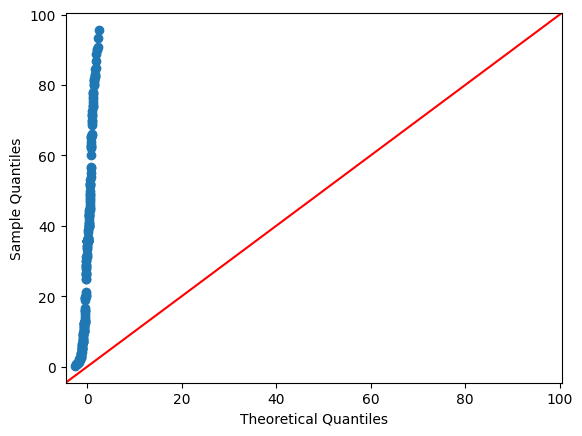

In [16]:
#Q-Q Plot to check if our observations are normally distributed.
sm.qqplot(df["internetuserate"], line ='45')
py.show()

In [17]:
from scipy.stats import shapiro
shapiro(df["internetuserate"])

ShapiroResult(statistic=0.9308421611785889, pvalue=1.757870293772612e-08)

<Axes: xlabel='internetuserate', ylabel='Density'>

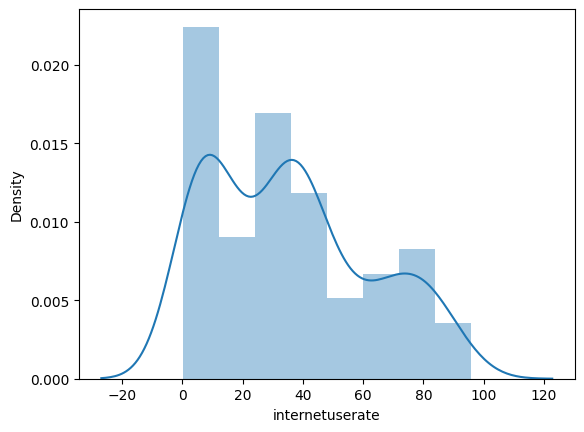

In [18]:
sns.distplot(df['internetuserate'], hist = True)

## Checking Outliers

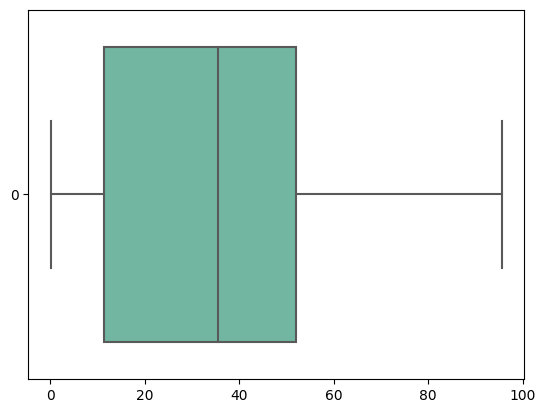

In [19]:
ax = sns.boxplot(data=df["internetuserate"], orient="h", palette="Set2")

In [20]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "internetuserate")
print(probable_outliers_tm)
print(possible_outliers_tm)

[]
[]


### Handling Outliers

In [21]:
Q1 = df['internetuserate'].quantile(0.25)
Q3 = df['internetuserate'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + whisker_width*IQR
df['internetuserate']= np.where(df['internetuserate'] > upper_whisker, upper_whisker, np.where(df['internetuserate'] < lower_whisker, lower_whisker, df['internetuserate']))

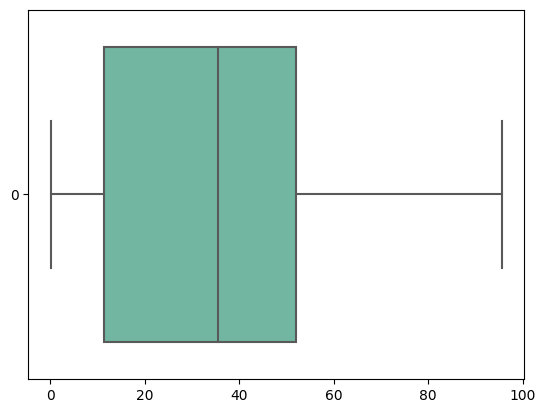

In [22]:
ax = sns.boxplot(data=df["internetuserate"], orient="h", palette="Set2")

### Visualisations

<Figure size 1500x800 with 0 Axes>

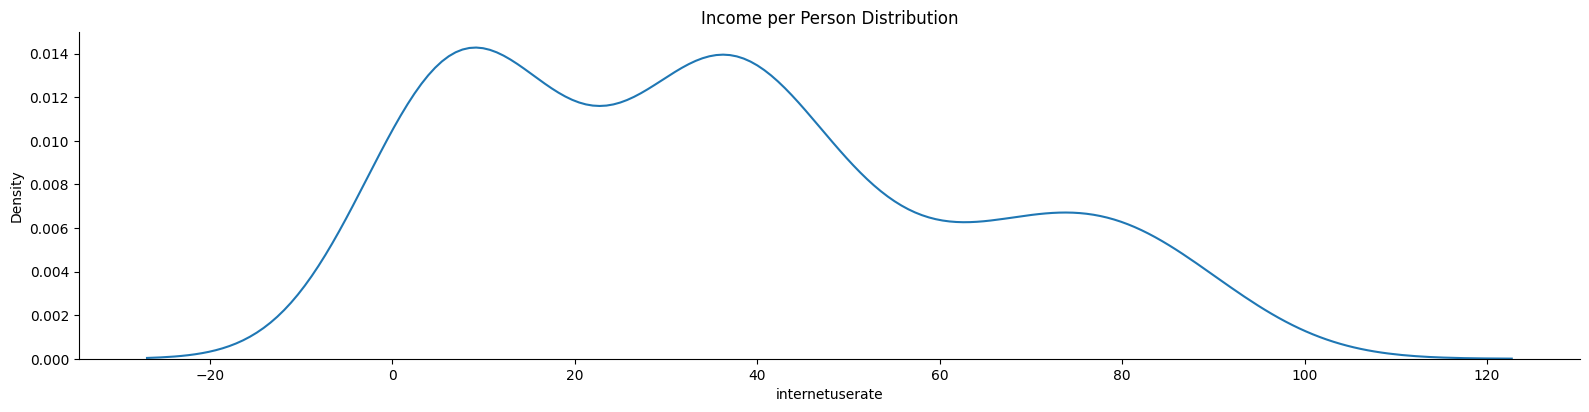

In [23]:
plt.figure(figsize = (15, 8))
sns.displot(df['internetuserate'], kind = 'kde', height=4, aspect=4).set(title = 'Income per Person Distribution')

<Axes: >

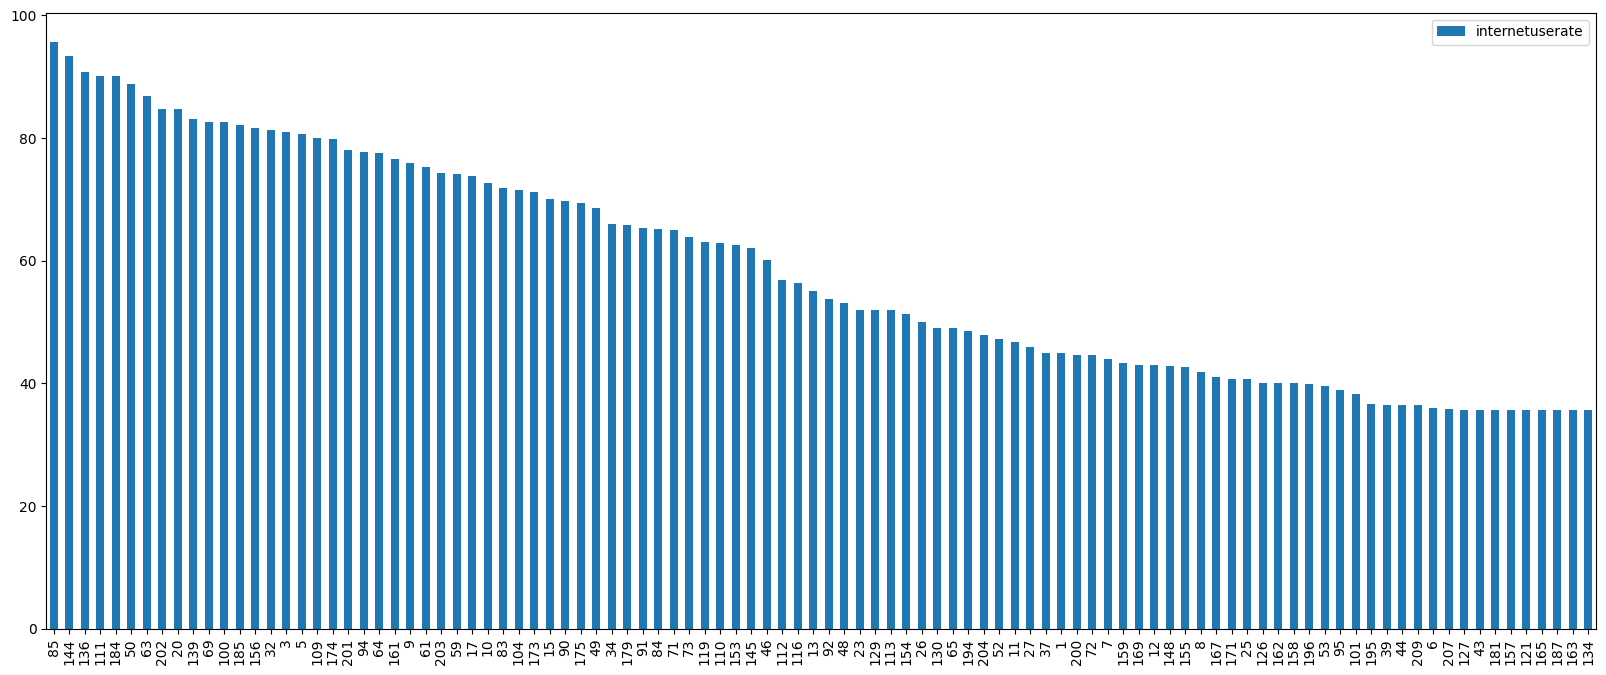

In [24]:
df.sort_values(by='internetuserate', ascending=False).head(100).plot.bar(y='internetuserate',figsize=(20,8))

In [25]:
px.choropleth(df,locations='countrycode',color='internetuserate',scope='world',
                    range_color=((100, 10000)),title='Income per person',height=1000)

<Axes: xlabel='internetuserate', ylabel='employrate'>

<Figure size 1200x800 with 0 Axes>

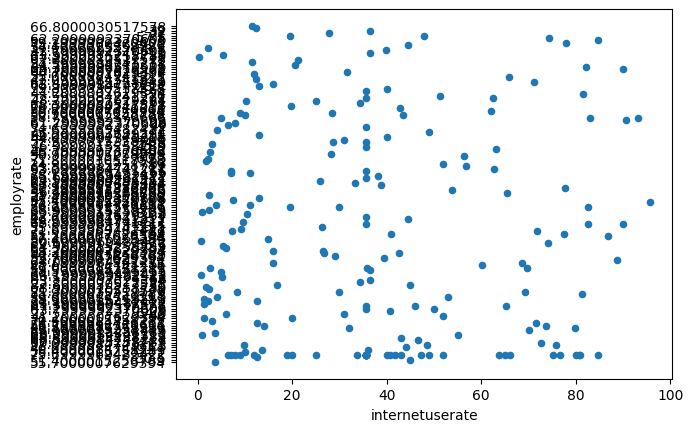

In [26]:
plt.figure(figsize = (12, 8))
df.plot.scatter(x='internetuserate',y='employrate')

In [27]:
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,countrycode
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.654,48.673,,0,,6.68438529968262,55.7000007629394,24.04,AFG
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.990,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72,ALB
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.500,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22,DZA
3,Andorra,21943.3398976022,10.17,,,,,,81.000,,,,,5.36217880249023,,88.92,AND
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,10.000,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7,AGO


In [32]:
for col in df.iloc[:,1:-1].columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].astype(float)

In [29]:
df.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate         float64
lifeexpectancy          float64
oilperperson            float64
polityscore             float64
relectricperperson      float64
suicideper100th         float64
employrate              float64
urbanrate               float64
countrycode              object
dtype: object

df['incomeperperson'] = pd.to_numeric(df['incomeperperson'], errors='coerce')
df["incomeperperson"] = df["incomeperperson"].astype(float)

df['alcconsumption'] = pd.to_numeric(df['alcconsumption'], errors='coerce')
df["alcconsumption"] = df["alcconsumption"].astype(float)

df['armedforcesrate'] = pd.to_numeric(df['armedforcesrate'], errors='coerce')
df["armedforcesrate"] = df["armedforcesrate"].astype(float)

df['breastcancerper100th'] = pd.to_numeric(df['breastcancerper100th'], errors='coerce')
df["breastcancerper100th"] = df["breastcancerper100th"].astype(float)

df['co2emissions'] = pd.to_numeric(df['co2emissions'], errors='coerce')
df["co2emissions"] = df["co2emissions"].astype(float)

df['femaleemployrate'] = pd.to_numeric(df['femaleemployrate'], errors='coerce')
df["femaleemployrate"] = df["femaleemployrate"].astype(float)

df['hivrate'] = pd.to_numeric(df['hivrate'], errors='coerce')
df["hivrate"] = df["hivrate"].astype(float)

df['internetuserate'] = pd.to_numeric(df['internetuserate'], errors='coerce')
df["internetuserate"] = df["internetuserate"].astype(float)

df['lifeexpectancy'] = pd.to_numeric(df['lifeexpectancy'], errors='coerce')
df["lifeexpectancy"] = df["lifeexpectancy"].astype(float)

df['oilperperson'] = pd.to_numeric(df['oilperperson'], errors='coerce')
df["oilperperson"] = df["oilperperson"].astype(float)

df['polityscore'] = pd.to_numeric(df['polityscore'], errors='coerce')
df["polityscore"] = df["polityscore"].astype(float)

df['relectricperperson'] = pd.to_numeric(df['relectricperperson'], errors='coerce')
df["relectricperperson"] = df["relectricperperson"].astype(float)

df['suicideper100th'] = pd.to_numeric(df['suicideper100th'], errors='coerce')
df["suicideper100th"] = df["suicideper100th"].astype(float)

df['relectricperperson'] = pd.to_numeric(df['relectricperperson'], errors='coerce')
df["relectricperperson"] = df["relectricperperson"].astype(float)

df['employrate'] = pd.to_numeric(df['employrate'], errors='coerce')
df["employrate"] = df["employrate"].astype(float)

df['urbanrate'] = pd.to_numeric(df['urbanrate'], errors='coerce')
df["urbanrate"] = df["urbanrate"].astype(float)

df['suicideper100th'] = pd.to_numeric(df['suicideper100th'], errors='coerce')
df["suicideper100th"] = df["suicideper100th"].astype(float)

In [30]:
"""
df_quant = df[["incomeperperson", "alcconsumption", "armedforcesrate", "breastcancerper100th", "co2emissions", "femaleemployrate",
                "hivrate", "internetuserate", "lifeexpectancy", "oilperperson", "polityscore", "relectricperperson", "suicideper100th",
                "employrate", "urbanrate"]]
df_qual = df[["country", "countrycode"]]
"""

'\ndf_quant = df[["incomeperperson", "alcconsumption", "armedforcesrate", "breastcancerper100th", "co2emissions", "femaleemployrate",\n                "hivrate", "internetuserate", "lifeexpectancy", "oilperperson", "polityscore", "relectricperperson", "suicideper100th",\n                "employrate", "urbanrate"]]\ndf_qual = df[["country", "countrycode"]]\n'

In [31]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(df_quant)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(df_quant, columns=component_names)

X_pca.head()

NameError: ignored